# Exercise 1

We first consider **scipy.stats**' *uniform* RNG to generate several sequences of length $n_i$. For this exercise seciton, we consider the uniform distribution $U(0,1)$.

In [4]:
## -------------------- Import necesary libraries --------------------
from scipy.stats import uniform, norm, probplot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## -------------------- Define parameters --------------------
# Sample sizes
sample_sizes = [45, 100, 10**3, 10**5] 

# Uniform distribution parameters U(0,1)
loc = 0
scale = 1

## **Part** *(1.a)*:

In this following snippet, we plot the theoretical Cummulative Distribution Function (CDF) $F(x) = 0 \text{ for } x < a, F(x) = (x - a) / (b - a) \text{ for a } ≤ x ≤ b \text{, and } F(x) = 1 \text{ for } x > b$ and compare it to the empirical CDF $\hat{F}(x)$.

In [5]:
## -------------- Define Theoretical CDF -------------------
X = np.linspace(loc, loc + scale, 10000)
cdf_theorical = uniform.cdf(X, loc=loc, scale=scale)

IndexError: index 45 is out of bounds for axis 0 with size 4

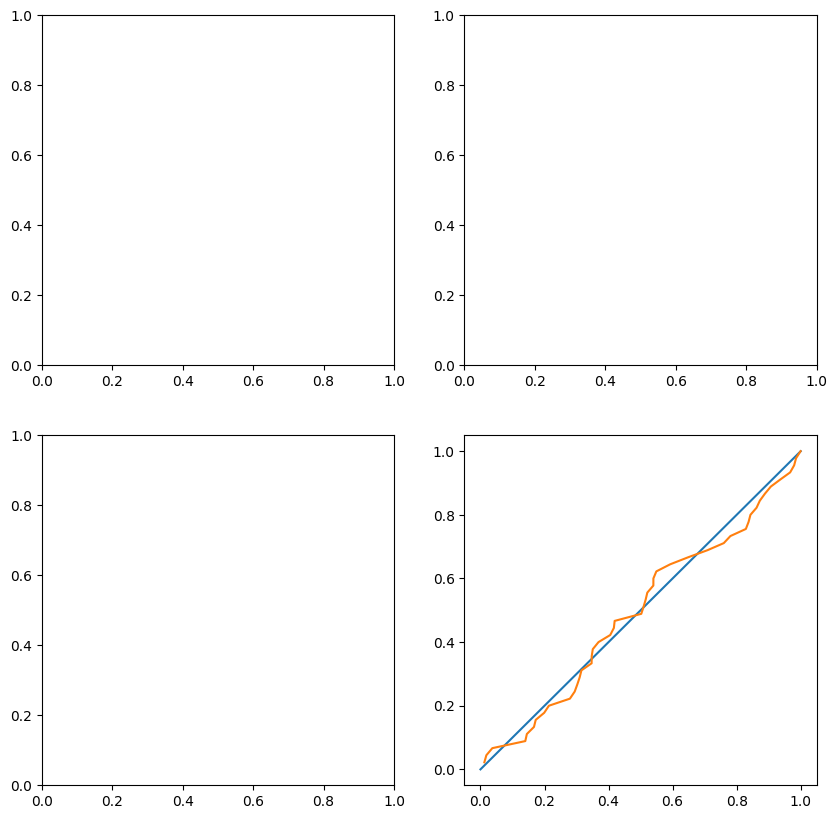

In [ ]:
## -------------- Define Empirical CDF & Plot -----------------
fig, ax = plt.subplots(2, 2, figsize=(10,10)) # 2x2 Figure (since we have 4 sequences)
ax = ax.flatten()

for n in enumerate(sample_sizes):
    # Generate n random numbers from U(0,1)
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)

    # Define empirical CDF
    x_Ecdf = np.sort(random_numbers) # Sort "randomized" values
    y_Ecdf = np.arange(1,n+1)/n # Create equispaced range for y-axis (1/n, ..., n/n+1)

    # Plot
    plt.plot(X, cdf_theorical, label="Theoretical cdf(x) for $U(0,1)$")
    plt.plot(x_Ecdf, y_Ecdf, label=f"Empirical cdf(x) for n={n}")

    # Plot configuration: Subplots
    ax[n].set_title(f"Theoretical v. Empirical cdf(x) (n={n})")
    ax[n].set_xlabel("x-values$")
    ax[n].set_ylabel("cdf(x)")